## Problem Statement

<B>What is Customer Churn?</B>

Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 % in this highly competitive market.

Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.


To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few.

As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy.


<B>Objectives</B>
    
I will explore the data and try to answer some questions like:

<LI> What's the % of Churn Customers and customers that keep in with the active services?
<LI> Is there any patterns in Churn Customers based on the gender?
<LI> Is there any patterns/preference in Churn Customers based on the type of service provided?
<LI> What's the most profitable service types?
<LI> Which features and services are most profitable?
<LI> Many more questions that will arise during the analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('telecom_data.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.describe(include=object)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Data Preprocessing

In [8]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [9]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data.drop('customerID',axis=1,inplace=True)

## EDA

In [12]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [13]:
(data['Churn'].value_counts()/len(data))*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

1869 of customer are left about 26.5 percentage from overall, this like an imbalance dataset


In [14]:
# How many amount loss from customer churn

loss = []
for values in data.loc[data['Churn'] == 'Yes', 'TotalCharges']:
    value = float(values)
    loss.append(value)
print(np.round(sum(loss)))

2862927.0


We have lost arround $2862927 due to customer churn

## Data Visualization

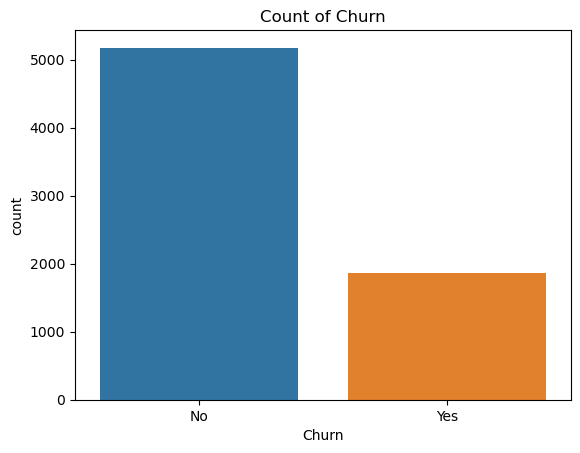

In [15]:
# plotting with target feature

sns.countplot(data=data, x='Churn')
plt.title('Count of Churn')
plt.show()

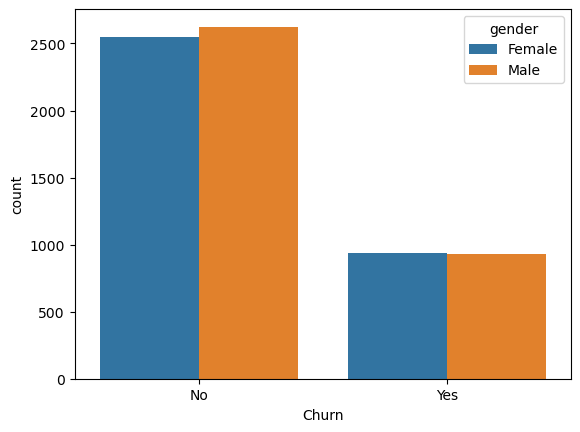

In [16]:
# Gender-wise customer churn

sns.countplot(x='Churn',data=data,hue='gender')
plt.show()

<Axes: xlabel='Churn', ylabel='count'>

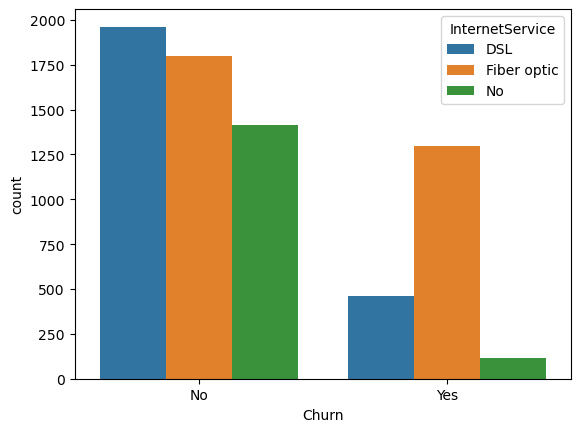

In [17]:
# Internet-service wise customer churn

sns.countplot(x='Churn',data=data, hue='InternetService')

<Axes: xlabel='TechSupport', ylabel='count'>

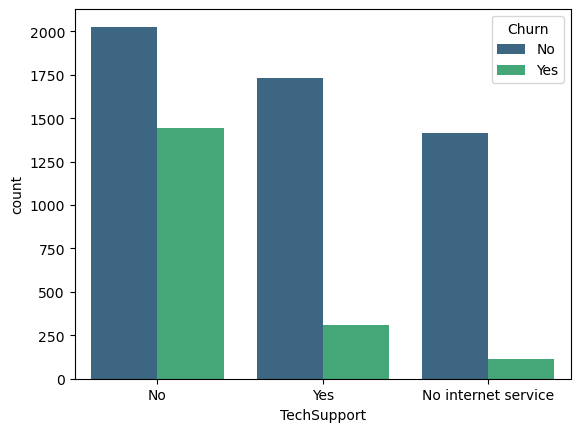

In [18]:
# techSupport wise churn

sns.countplot(x='TechSupport',data=data, hue='Churn',palette='viridis')

<Axes: xlabel='tenure', ylabel='Count'>

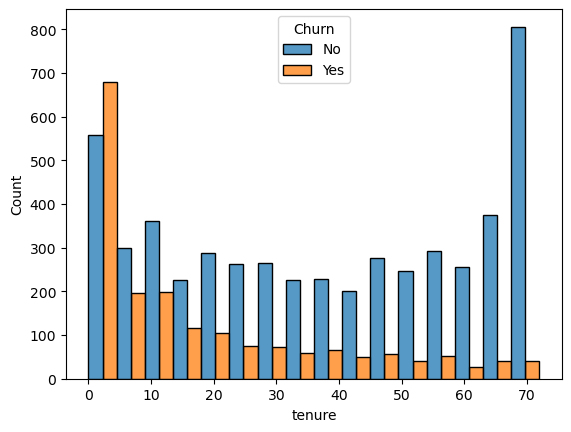

In [19]:
sns.histplot(x = 'tenure', hue = 'Churn', data = data, multiple='dodge')

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

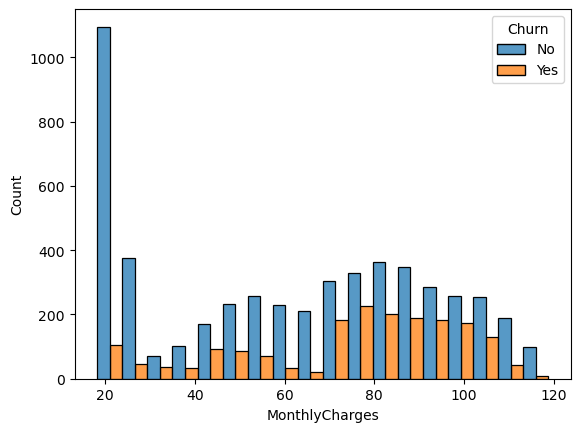

In [20]:
sns.histplot(x='MonthlyCharges',hue='Churn',data=data,multiple='dodge')

Text(0.5, 1.0, '% of Senior Citizens')

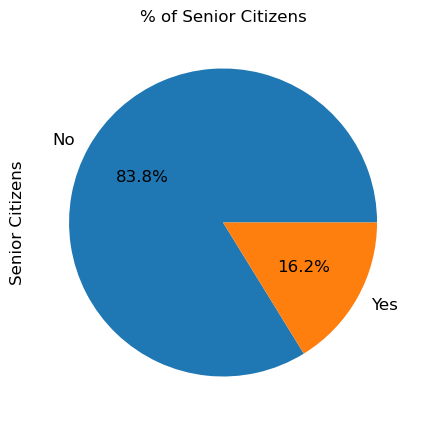

In [21]:
# pie chart for Count of Senior citizens
ax = (data['SeniorCitizen'].value_counts()*100.0 /len(data)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

Only 16.2% customers who are senior citizons but remaining 83.8% customers are young people

## Univariate Analysis:

<Figure size 640x480 with 0 Axes>

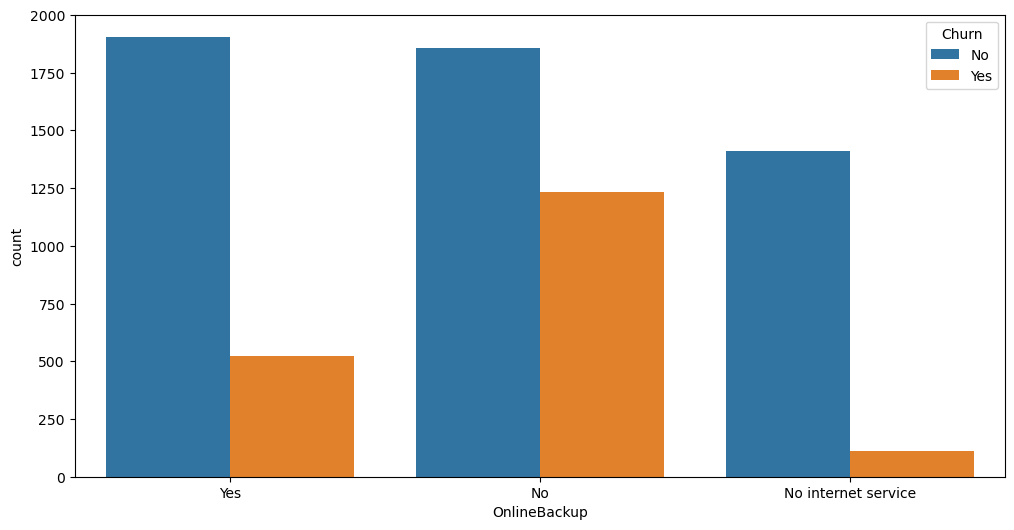

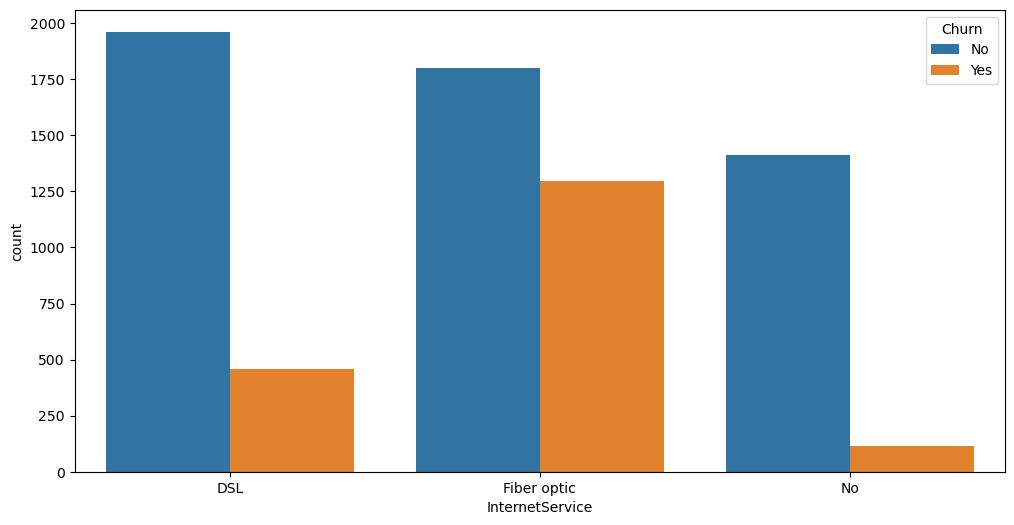

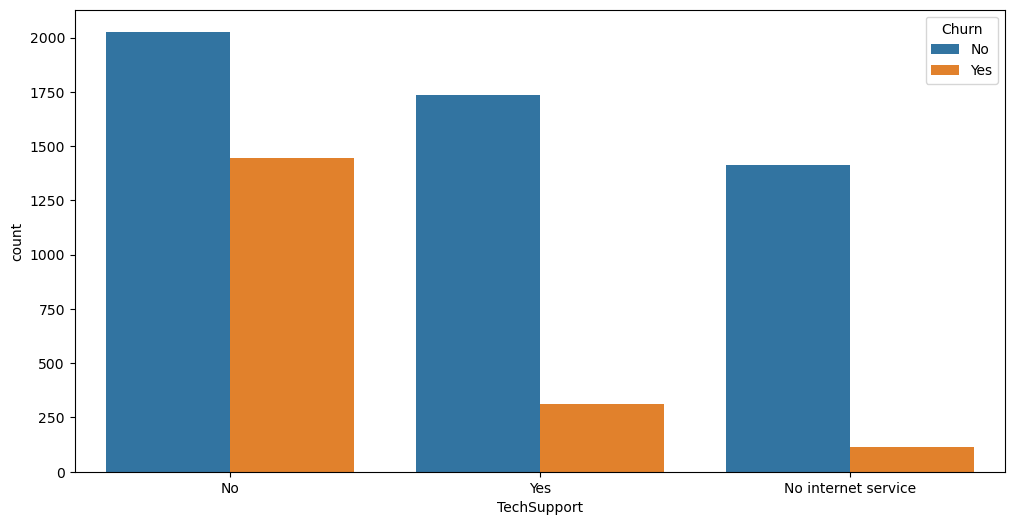

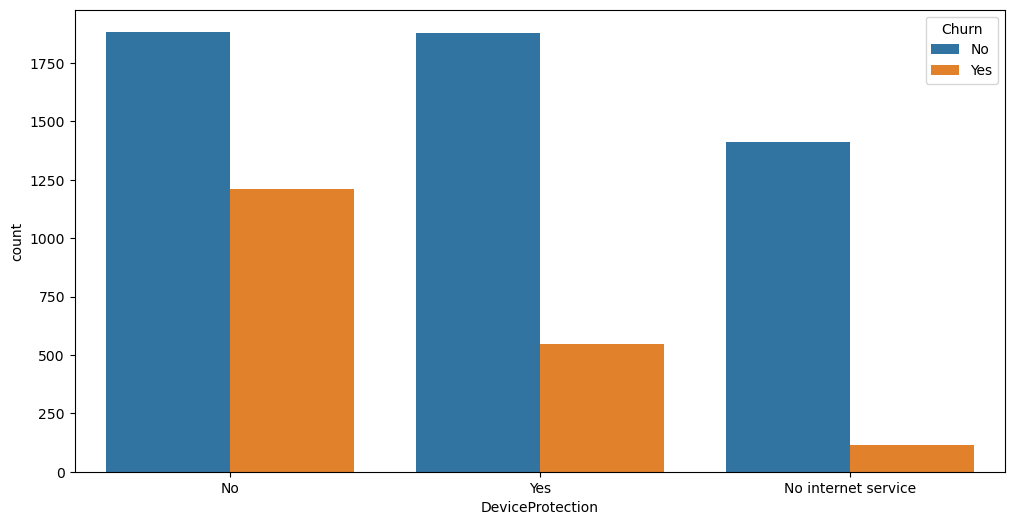

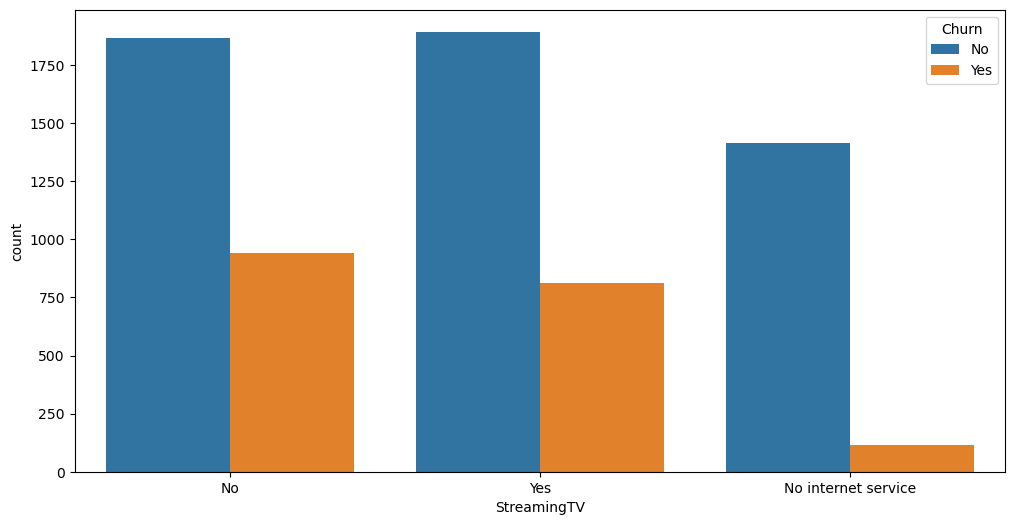

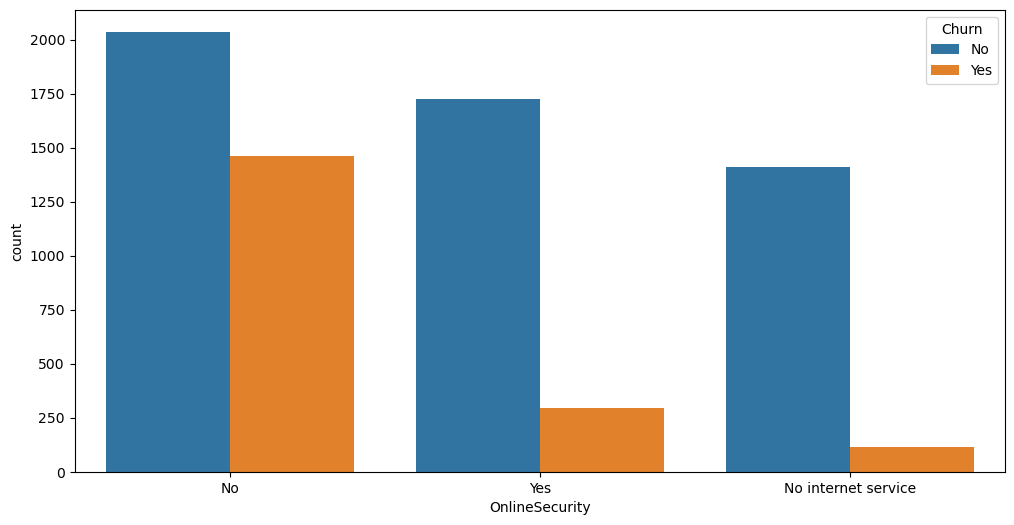

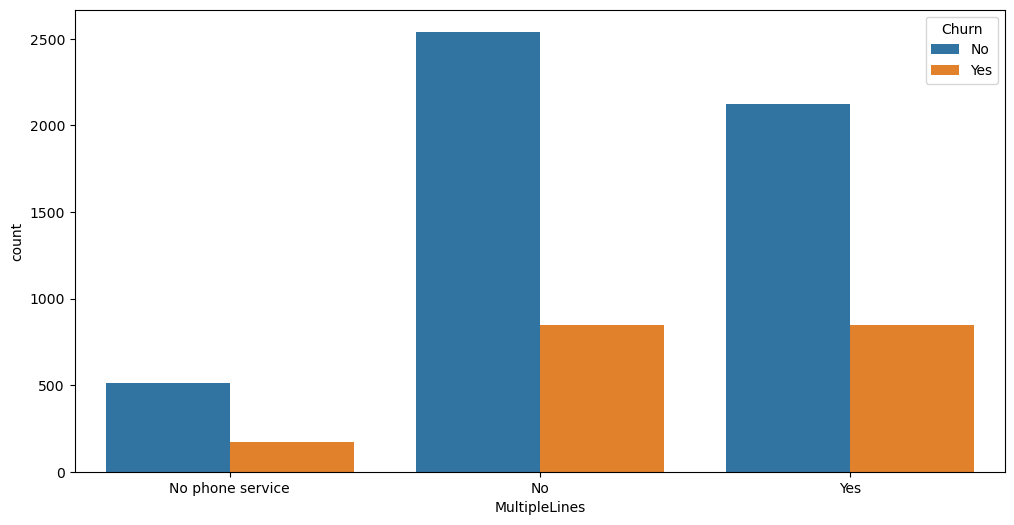

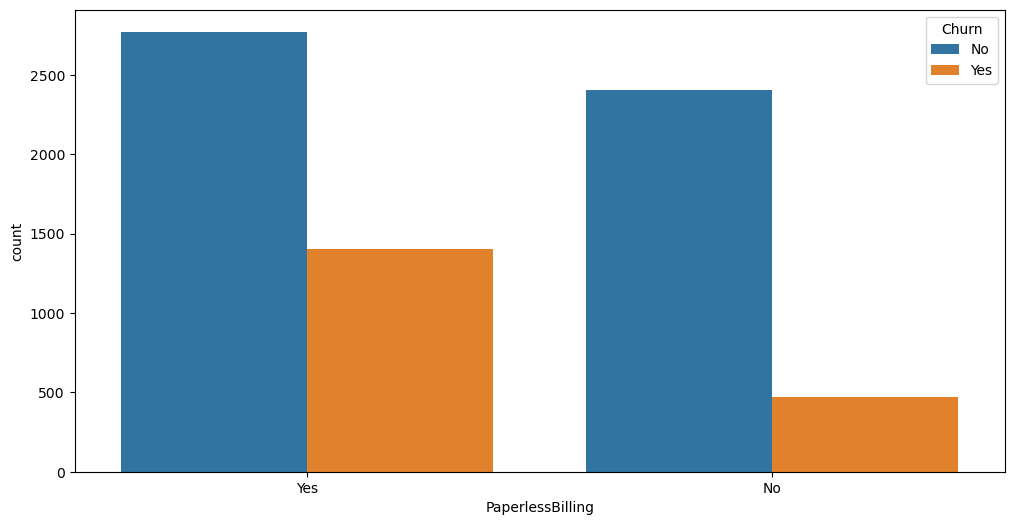

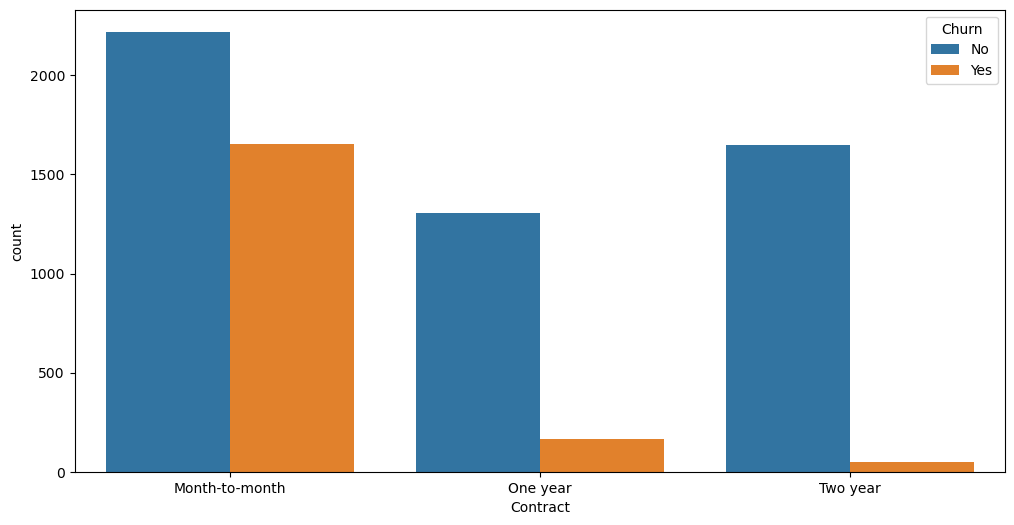

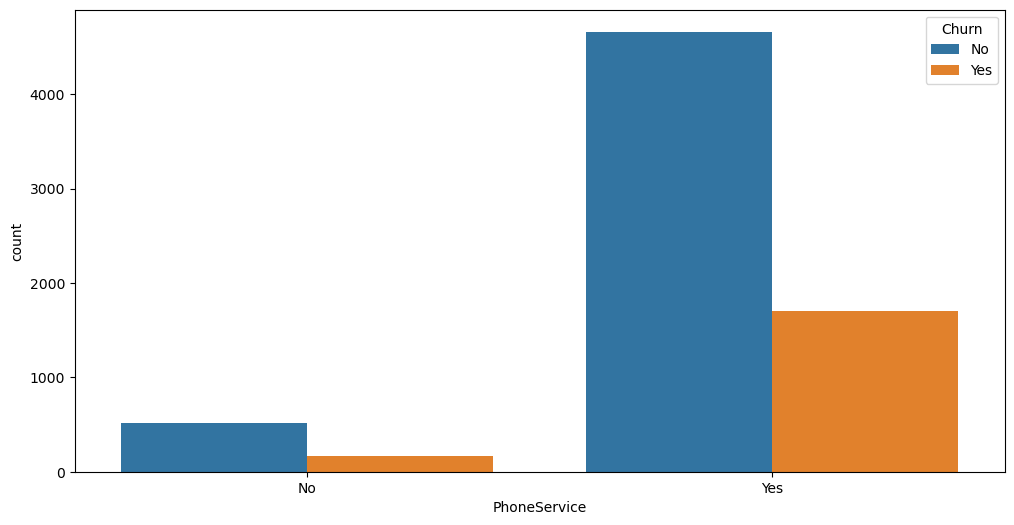

<Figure size 640x480 with 0 Axes>

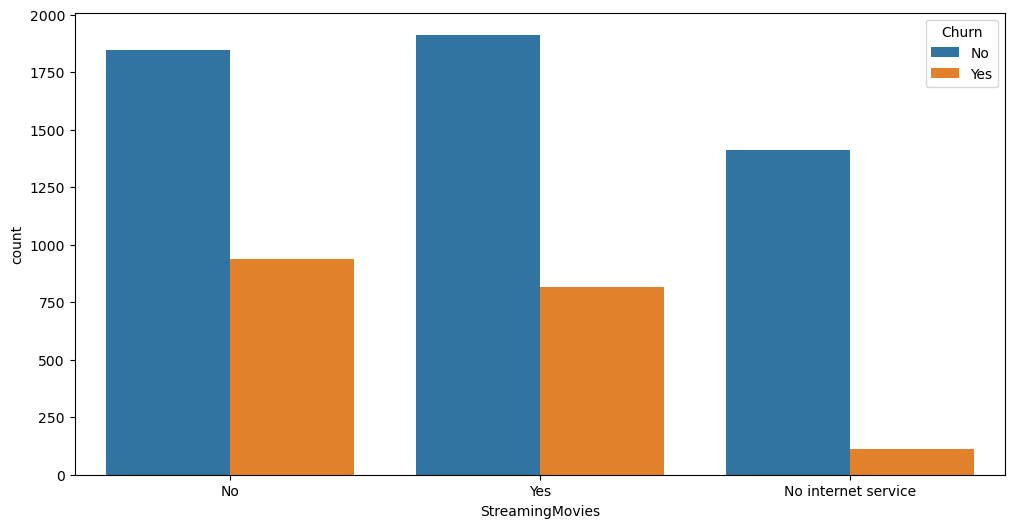

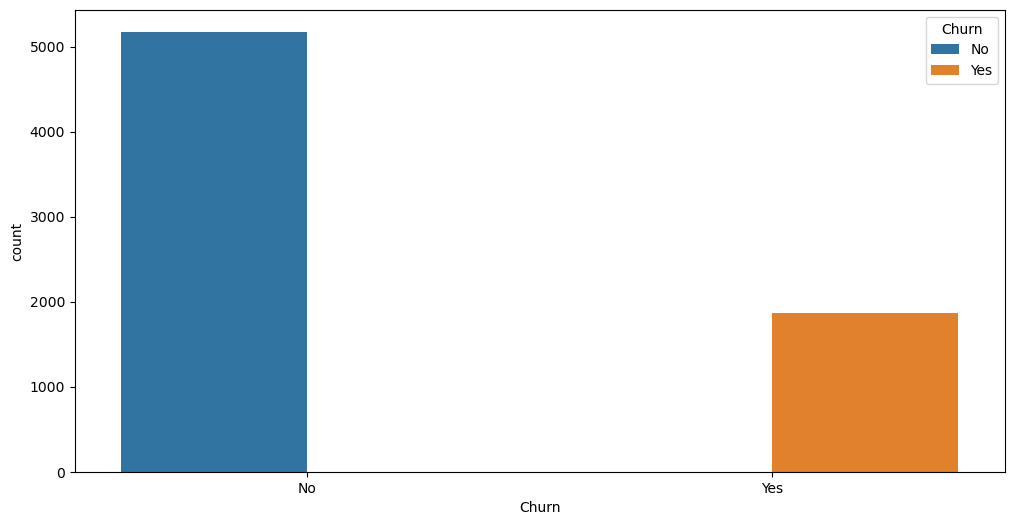

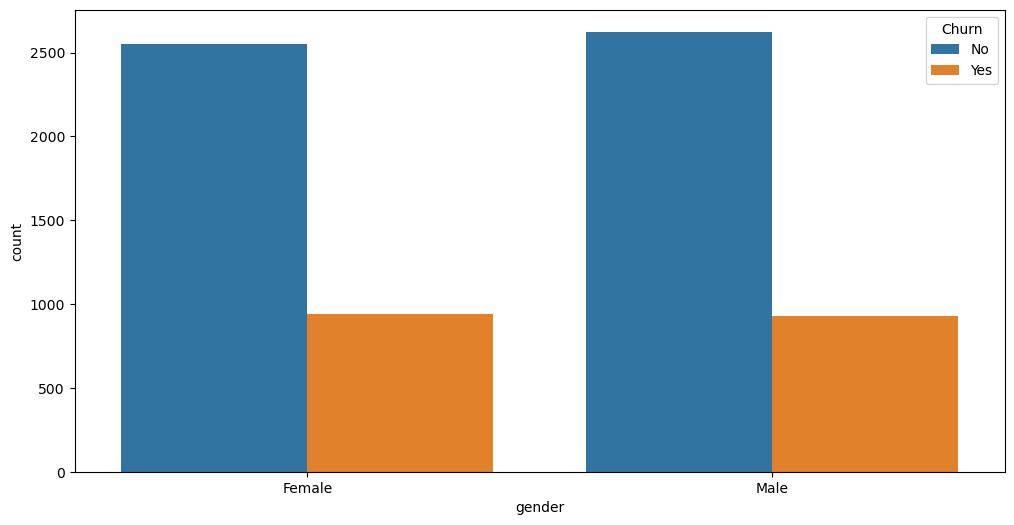

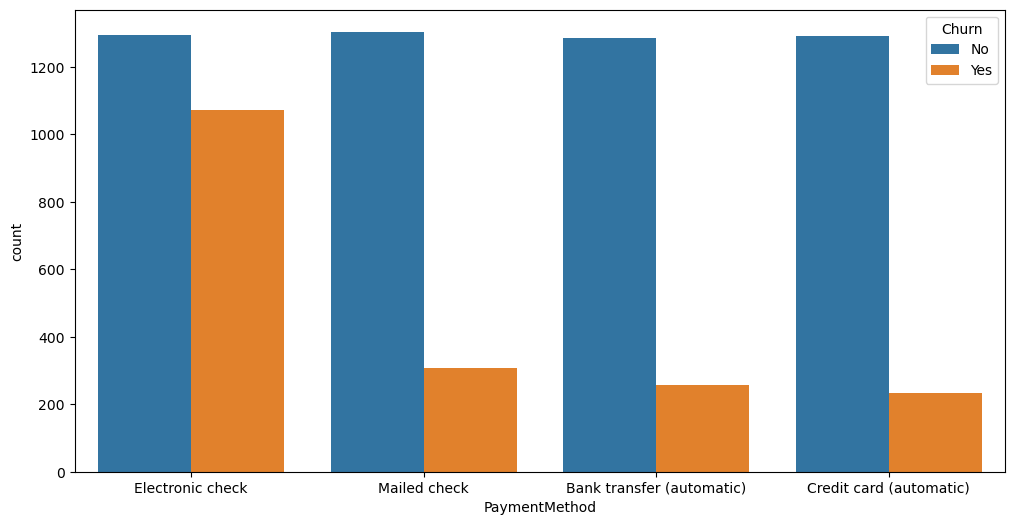

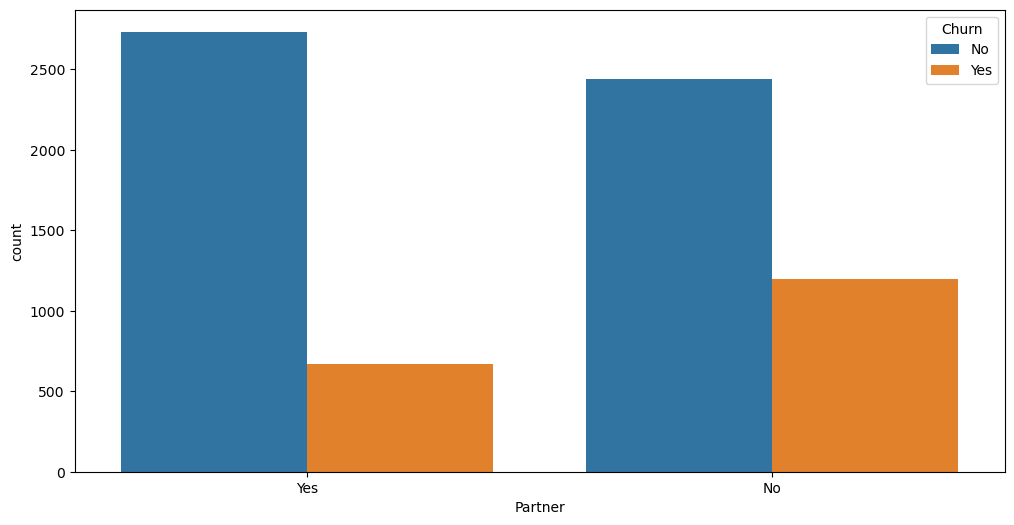

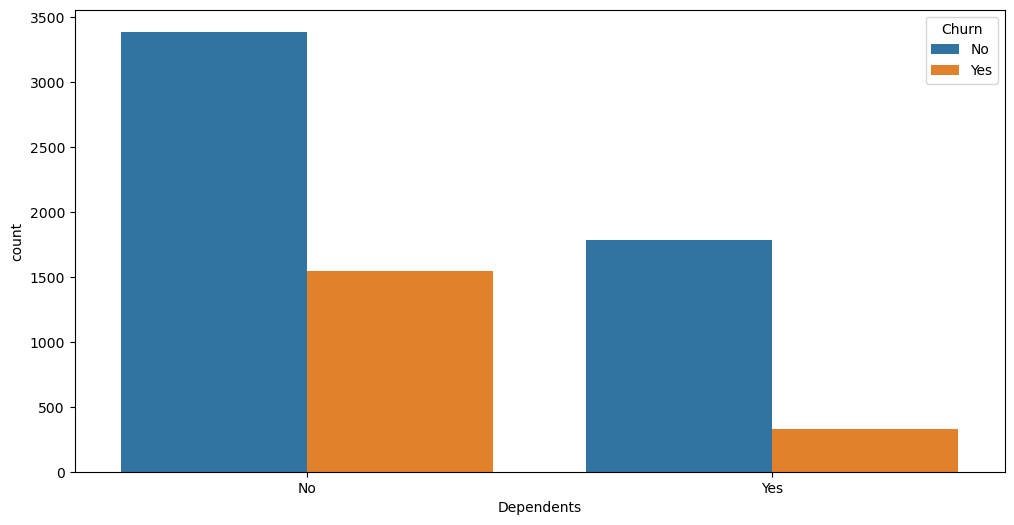

In [22]:
for i, feature in enumerate({feature for feature in data.columns if data[feature].dtypes == 'O'}):
    if feature != 'TotalCharges':
        if feature != 'customerID':
            plt.figure(i)
            plt.figure(figsize=(12,6))
            sns.countplot(data=data, x=feature, hue='Churn')
plt.show()

## Encoding the categorical column

In [23]:
from sklearn.preprocessing import LabelEncoder

def object_to_int(df):
    if df.dtype=='object':
        df = LabelEncoder().fit_transform(df)
    return df

In [24]:
data = data.apply(lambda x: object_to_int(x))
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [25]:
from sklearn.preprocessing import MinMaxScaler
features = data.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data))
data.columns = features
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.383614,0.0
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.224502,0.0
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.024043,1.0
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.214395,0.0
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.141654,1.0


In [29]:
x=data.drop('Churn',axis=1)
y=data['Churn']

In [30]:
# selects the feature which has more correlation
from sklearn.feature_selection import SelectKBest

selection = SelectKBest()  # k=10 default
X = selection.fit_transform(x,y)


In [31]:
#  this will shows which feature are taken denote as True other are removed like false
selection.get_support()

array([False,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
       False])

According to the feature selection, we selects the 10 out of 21 features. these are the 10 features are selected [SeniorCitizen,Dependents, tenure, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, Contract, PaperlessBilling, MonthlyCharges]

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression

Log_reg = LogisticRegression(C=150, max_iter=150)
Log_reg.fit(x_train, y_train)
log_pred = Log_reg.predict(x_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(f'Accuracy score : {accuracy_score(log_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(log_pred, y_test)}')
print(f'Classification report :\n {classification_report(log_pred, y_test)}')

Accuracy score : 0.8057921635434412
Confusion matrix :
 [[1158  218]
 [ 124  261]]
Classification report :
               precision    recall  f1-score   support

         0.0       0.90      0.84      0.87      1376
         1.0       0.54      0.68      0.60       385

    accuracy                           0.81      1761
   macro avg       0.72      0.76      0.74      1761
weighted avg       0.82      0.81      0.81      1761



In [35]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier(n_estimators=120,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=5)
Rfc.fit(x_train, y_train)
rfc_pred = Rfc.predict(x_test)

print(f'Accuracy score : {accuracy_score(rfc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_pred, y_test)}')
print(f'Classification report :\n {classification_report(rfc_pred, y_test)}')

Accuracy score : 0.8023850085178875
Confusion matrix :
 [[1179  245]
 [ 103  234]]
Classification report :
               precision    recall  f1-score   support

         0.0       0.92      0.83      0.87      1424
         1.0       0.49      0.69      0.57       337

    accuracy                           0.80      1761
   macro avg       0.70      0.76      0.72      1761
weighted avg       0.84      0.80      0.81      1761



In [36]:
from sklearn.tree import DecisionTreeClassifier

Dtc = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_leaf=15)
Dtc.fit(x_train, y_train)
dtc_pred = Dtc.predict(x_test)

print(f'Accuracy score : {accuracy_score(dtc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_pred, y_test)}')
print(f'Classification report :\n {classification_report(dtc_pred, y_test)}')

Accuracy score : 0.7978421351504826
Confusion matrix :
 [[1180  254]
 [ 102  225]]
Classification report :
               precision    recall  f1-score   support

         0.0       0.92      0.82      0.87      1434
         1.0       0.47      0.69      0.56       327

    accuracy                           0.80      1761
   macro avg       0.70      0.76      0.71      1761
weighted avg       0.84      0.80      0.81      1761



As we compare to the imbalance dataset our model are perform like okay not a better model to build for end to end project. So we need to over smpling data for reducing the TN, FN and increase the FP and TP for model building

In [37]:
from imblearn.combine import SMOTEENN
from collections import Counter

st=SMOTEENN()
X_train_st,y_train_st = st.fit_resample(x_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_st)))

The number of classes before fit Counter({0.0: 3892, 1.0: 1390})
The number of classes after fit Counter({0.0: 2294, 1.0: 2224})


In [38]:
# splitting the over sampling dataset 
X_train_sap, X_test_sap, y_train_sap, y_test_sap = train_test_split(X_train_st, y_train_st, test_size=0.2)

In [39]:
# decisionTree Classifier
Dtc_sampling = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=7, min_samples_leaf=15)
Dtc_sampling.fit(X_train_sap, y_train_sap)
dtc_sampling_pred = Dtc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(dtc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(dtc_sampling_pred, y_test_sap)}')

Accuracy score : 0.9192477876106194
Confusion matrix :
 [[414  41]
 [ 32 417]]
Classification report :
               precision    recall  f1-score   support

         0.0       0.93      0.91      0.92       455
         1.0       0.91      0.93      0.92       449

    accuracy                           0.92       904
   macro avg       0.92      0.92      0.92       904
weighted avg       0.92      0.92      0.92       904



In [40]:
# Random forest classifier
Rfc_sampling = RandomForestClassifier(n_estimators=150,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=6)
Rfc_sampling.fit(X_train_sap, y_train_sap)
rfc_sampling_pred = Rfc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(rfc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(rfc_sampling_pred, y_test_sap)}')

Accuracy score : 0.9457964601769911
Confusion matrix :
 [[425  28]
 [ 21 430]]
Classification report :
               precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       453
         1.0       0.94      0.95      0.95       451

    accuracy                           0.95       904
   macro avg       0.95      0.95      0.95       904
weighted avg       0.95      0.95      0.95       904



In [41]:
# logistic regression
Log_reg_sampling = LogisticRegression(C=10, max_iter=150)
Log_reg_sampling.fit(X_train_sap, y_train_sap)
Log_sampling_pred = Log_reg_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(Log_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(Log_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(Log_sampling_pred, y_test_sap)}')

Accuracy score : 0.9137168141592921
Confusion matrix :
 [[410  42]
 [ 36 416]]
Classification report :
               precision    recall  f1-score   support

         0.0       0.92      0.91      0.91       452
         1.0       0.91      0.92      0.91       452

    accuracy                           0.91       904
   macro avg       0.91      0.91      0.91       904
weighted avg       0.91      0.91      0.91       904



In [42]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_sap, y_train_sap)
pred = gbc.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.9413716814159292
Confusion matrix :
 [[421  28]
 [ 25 430]]
Classification report :
               precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       449
         1.0       0.94      0.95      0.94       455

    accuracy                           0.94       904
   macro avg       0.94      0.94      0.94       904
weighted avg       0.94      0.94      0.94       904



In [43]:
param_grid = {'n_estimators':[100, 150, 200, 250, 300],
             'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
             'min_samples_split': [2,3,4,5,6,7,8,9,10],
             'min_samples_leaf': [1,3,5,7,9,11,13,15],'max_leaf_nodes': [3,6,8,9,12,15,18,24],
              'max_depth': [3,5,7,9,11,13,15,17,19],
              'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              'loss': ['deviance', 'exponential']
              }

In [44]:
from sklearn.model_selection import RandomizedSearchCV
gbc_optm = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid,n_iter=100, verbose=3)
gbc_optm.fit(X_train_sap, y_train_sap)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END criterion=friedman_mse, learning_rate=0.5, loss=exponential, max_depth=5, max_leaf_nodes=12, min_samples_leaf=11, min_samples_split=10, n_estimators=200;, score=0.949 total time=   1.7s
[CV 2/5] END criterion=friedman_mse, learning_rate=0.5, loss=exponential, max_depth=5, max_leaf_nodes=12, min_samples_leaf=11, min_samples_split=10, n_estimators=200;, score=0.954 total time=   1.7s
[CV 3/5] END criterion=friedman_mse, learning_rate=0.5, loss=exponential, max_depth=5, max_leaf_nodes=12, min_samples_leaf=11, min_samples_split=10, n_estimators=200;, score=0.968 total time=   1.7s
[CV 4/5] END criterion=friedman_mse, learning_rate=0.5, loss=exponential, max_depth=5, max_leaf_nodes=12, min_samples_leaf=11, min_samples_split=10, n_estimators=200;, score=0.949 total time=   1.7s
[CV 5/5] END criterion=friedman_mse, learning_rate=0.5, loss=exponential, max_depth=5, max_leaf_nodes=12, min_samples_leaf=11, min_samples_sp

C:\Users\aeccs\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
355 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
115 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aeccs\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aeccs\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\aeccs\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\aeccs\anaconda3\Lib\site-packag

RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_iter=100,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.4, 0.5],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [3, 5, 7, 9, 11, 13, 15,
                                                      17, 19],
                                        'max_leaf_nodes': [3, 6, 8, 9, 12, 15,
                                                           18, 24],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]},
                   verbose=3)

In [45]:
gbc_optm.best_estimator_

GradientBoostingClassifier(learning_rate=0.5, loss='exponential', max_depth=11,
                           max_leaf_nodes=24, min_samples_leaf=15,
                           min_samples_split=3, n_estimators=200)

In [46]:
# GradientBoostingClassifier
gbc_tunning = GradientBoostingClassifier(criterion='squared_error', learning_rate=0.3,
                           max_depth=19, max_leaf_nodes=24, min_samples_leaf=9,
                           min_samples_split=7, n_estimators=150)
gbc_tunning.fit(X_train_sap, y_train_sap)
pred = gbc_tunning.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.9612831858407079
Confusion matrix :
 [[432  21]
 [ 14 437]]
Classification report :
               precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       453
         1.0       0.95      0.97      0.96       451

    accuracy                           0.96       904
   macro avg       0.96      0.96      0.96       904
weighted avg       0.96      0.96      0.96       904



In [47]:
import pickle

In [48]:
pickle_out = open("Churn_classifier.pkl", mode = "wb") 
pickle.dump(gbc_tunning, pickle_out) 
pickle_out.close()